In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv("20190101_20251231_Cape_San_Juan.lev20")

In [21]:
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]


In [37]:
df['Date'] = pd.to_datetime(df['Date(dd:mm:yyyy)'], format='%d:%m:%Y', errors='coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()
df = df.replace(-999, pd.NA)
yearly_avg = df.groupby('Year').mean(numeric_only=True)
monthly_avg = df.groupby('Month').mean(numeric_only=True)
monthly_avg_each_year = df.groupby(['Year','Month']).mean(numeric_only=True)
monthly_avg_each_year = monthly_avg_each_year.reset_index()

monthly_avg_each_year['Month'] = pd.Categorical(
    monthly_avg_each_year['Month'],
    categories=month_order,
    ordered=True
)

# Now sort it properly
monthly_avg_each_year = monthly_avg_each_year.sort_values(['Year', 'Month'])

monthly_avg_each_year['Month'] = monthly_avg_each_year['Month'].astype(str) + monthly_avg_each_year['Year'].astype(str)


monthly_avg_each_year.head

<bound method NDFrame.head of     Year          Month  Day_of_Year  AOD_1020nm  AOD_870nm  AOD_675nm  \
3   2019   February2019    45.500000    0.068546   0.071912   0.075031   
6   2019      March2019    75.655172    0.060134   0.062872   0.065178   
0   2019      April2019   104.692308    0.069937   0.072978   0.076079   
7   2019        May2019   132.666667    0.081632   0.084186   0.086734   
5   2019       June2019   165.041667    0.188978   0.194717   0.201455   
4   2019       July2019   198.550000    0.177259   0.181300   0.185572   
1   2019     August2019   238.285714    0.316038   0.323244   0.340558   
9   2019  September2019   245.750000    0.129525   0.132528   0.138716   
8   2019   November2019   313.600000    0.114095   0.114105   0.116743   
2   2019   December2019   353.800000    0.076970   0.075093   0.075733   
14  2020    January2020    15.400000    0.066303   0.065588   0.069048   
13  2020   February2020    46.846154    0.095625   0.099252   0.104935   
17  2020

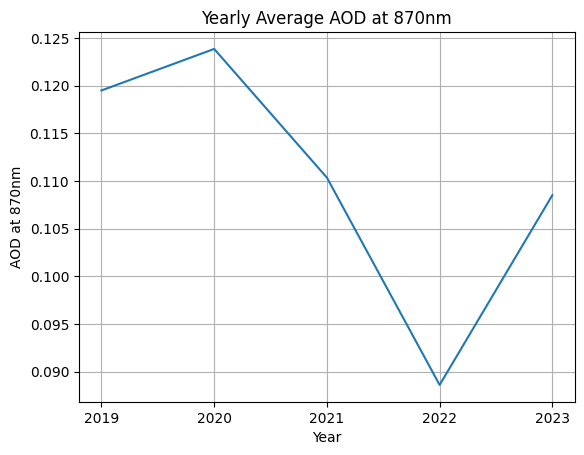

In [41]:
plt.plot(yearly_avg.index, yearly_avg['AOD_870nm'])
plt.xlabel('Year')
plt.ylabel('AOD at 870nm')
plt.title('Yearly Average AOD at 870nm')
plt.grid(True)
plt.xticks(np.arange(2019,2024))
plt.show()

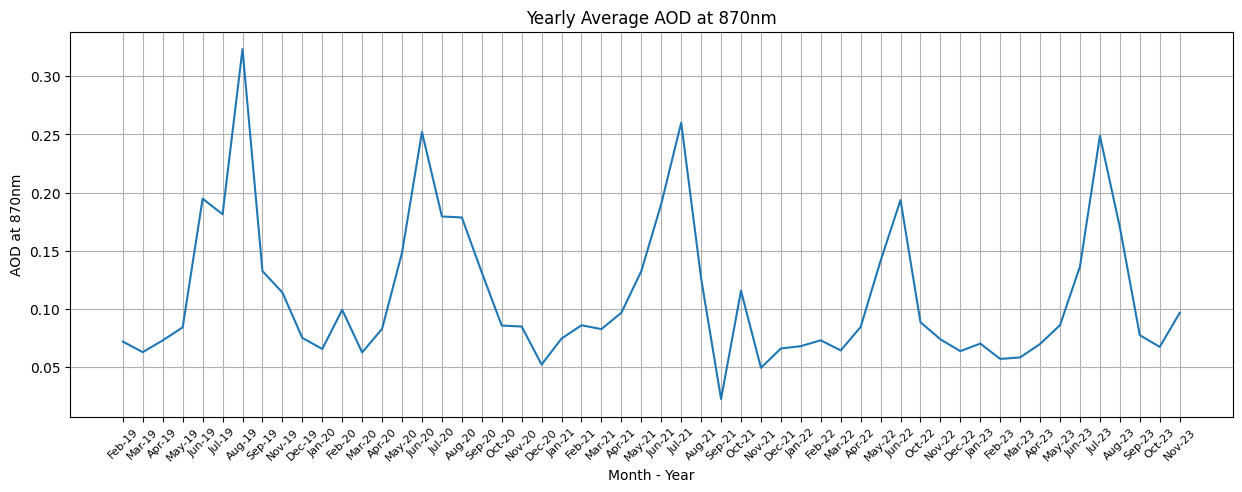

In [46]:
# Format the label
monthly_avg_each_year['Month_Year'] = monthly_avg_each_year['Month'].str[:3] + '-' + monthly_avg_each_year['Year'].astype(str).str[-2:]

# Plot
plt.figure(figsize=(15,5))
plt.plot(monthly_avg_each_year['Month_Year'], monthly_avg_each_year['AOD_870nm'])
plt.xlabel('Month - Year')
plt.ylabel('AOD at 870nm')
plt.title('Yearly Average AOD at 870nm')
plt.xticks(rotation=45, fontsize=8)
plt.grid(True)
plt.show()


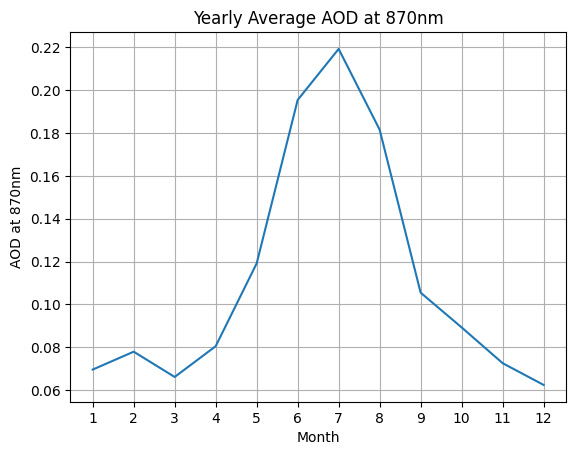

In [56]:
plt.plot(monthly_avg.index, monthly_avg['AOD_870nm'])
plt.xlabel('Month')
plt.ylabel('AOD at 870nm')
plt.title('Yearly Average AOD at 870nm')
plt.grid(True)
plt.xticks(np.arange(1,13))
plt.show()

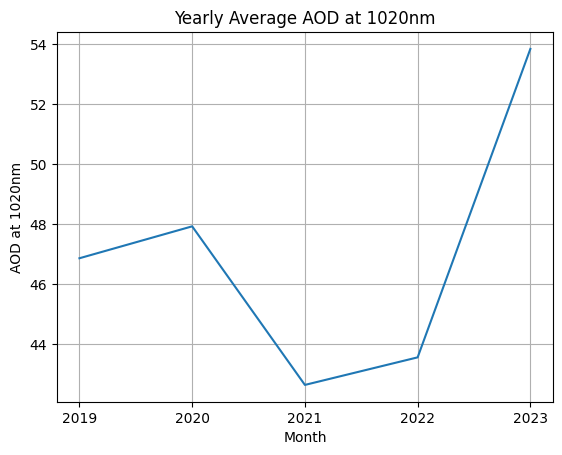

In [ ]:
plt.plot(yearly_avg.index, yearly_avg['N[AOD_1020nm]'])
plt.xlabel('Year')
plt.ylabel('AOD at 1020nm')
plt.title('Yearly Average AOD at 1020nm')
plt.grid(True)
plt.xticks(np.arange(2019,2024))
plt.show()

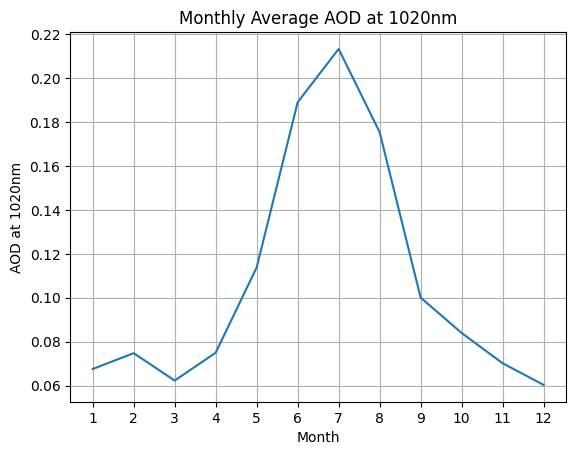

In [75]:
plt.plot(monthly_avg.index, monthly_avg['AOD_1020nm'])
plt.xlabel('Month')
plt.ylabel('AOD at 1020nm')
plt.title('Monthly Average AOD at 1020nm')
plt.grid(True)
plt.xticks(np.arange(1,13))
plt.show()

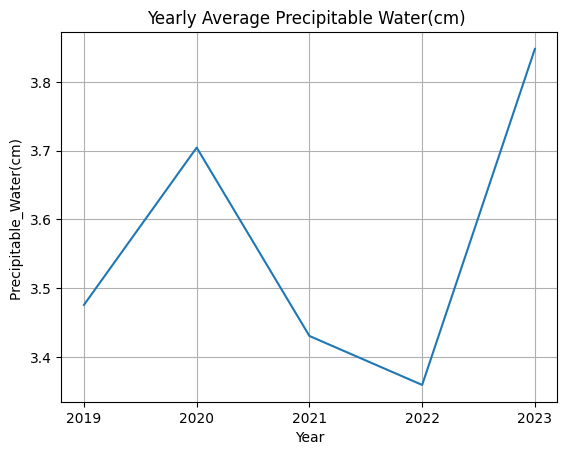

In [70]:
plt.plot(yearly_avg.index, yearly_avg['Precipitable_Water(cm)'])
plt.xlabel('Year')
plt.ylabel('Precipitable_Water(cm) ')
plt.title('Yearly Average Precipitable Water(cm) ')
plt.grid(True)
plt.xticks(np.arange(2019,2024))
plt.show()

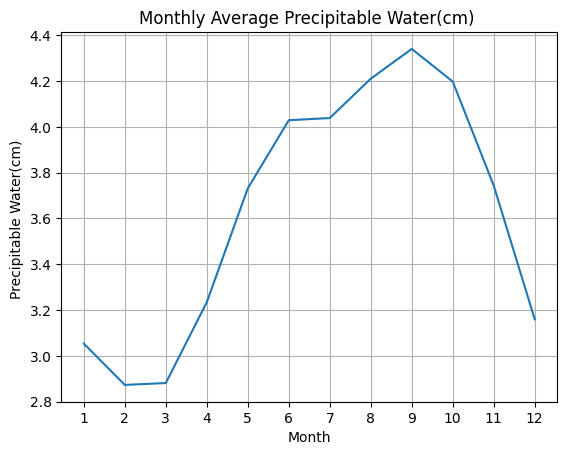

In [ ]:
plt.plot(monthly_avg.index, monthly_avg['Precipitable_Water(cm)'])
plt.xlabel('Month')
plt.ylabel('Precipitable Water(cm) ')
plt.title('Monthly Average Precipitable Water(cm) ')
plt.grid(True)
plt.xticks(np.arange(1,13))
plt.show()

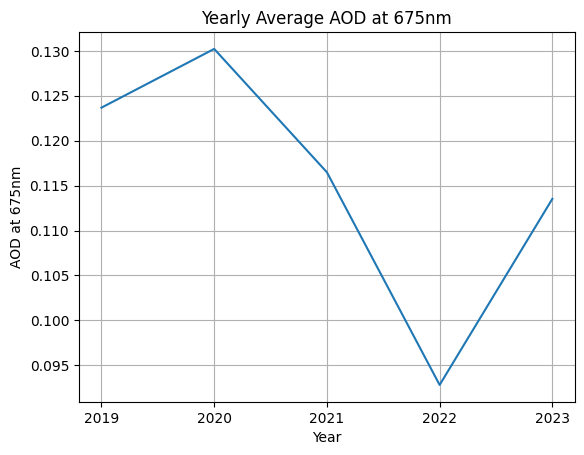

In [46]:
plt.plot(yearly_avg.index, yearly_avg['AOD_675nm'])
plt.xlabel('Year')
plt.ylabel('AOD at 675nm')
plt.title('Yearly Average AOD at 675nm')
plt.grid(True)
plt.xticks(np.arange(2019,2024))
plt.show()

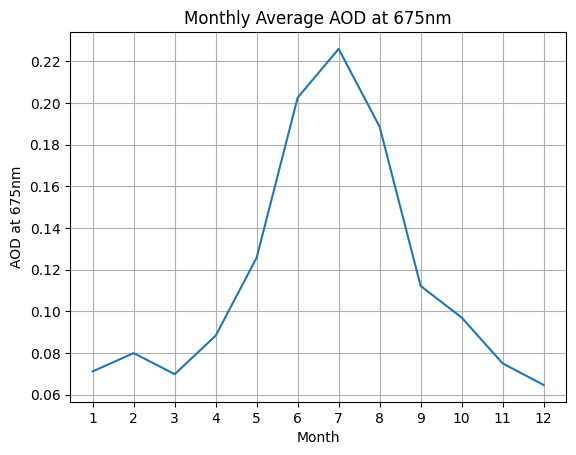

In [74]:
plt.plot(monthly_avg.index, monthly_avg['AOD_675nm'])
plt.xlabel('Month')
plt.ylabel('AOD at 675nm')
plt.title('Monthly Average AOD at 675nm')
plt.grid(True)
plt.xticks(np.arange(1,13))
plt.show()